In [1]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# The following variables represents for the ATNA face dataset
trainX1 = scipy.io.loadmat('ATNT face/trainX.mat')['trainX']
trainY1 = scipy.io.loadmat('ATNT face/trainY.mat')['trainY'][0]
trainX1 = np.array(trainX1)
trainY1 = np.array(trainY1)
testX1 = scipy.io.loadmat('ATNT face/testX.mat')['testX']
testY1 = scipy.io.loadmat('ATNT face/testY.mat')['testY'][0]
testX1 = np.array(testX1)
testY1 = np.array(testY1)

# The following variables represents for the Binalpha handwritten dataset
trainX2 = scipy.io.loadmat('Binalpha handwritten/trainX.mat')['trainX']
trainY2 = scipy.io.loadmat('Binalpha handwritten/trainY.mat')['trainY'][0]
trainX2 = np.array(trainX2)
trainY2 = np.array(trainY2)
testX2 = scipy.io.loadmat('Binalpha handwritten/testX.mat')['testX']
testY2 = scipy.io.loadmat('Binalpha handwritten/testY.mat')['testY'][0]
testX2 = np.array(testX2)
testY2 = np.array(testY2)

In [3]:
class DB_classifier():
    def __init__(self):
        self.no_label = 0
    def train(self,X,Y):
        self.trainX=X
        self.trainY=Y
    def distance(self,v1,v2):
        dist = np.sqrt(np.sum(np.square(v1 - v2)))
        return dist
    def majority_voting(self,X):
        label = np.argmax(np.bincount(X))
        return label
    def fit(self,X,r):
        self.no_label = 0
        num_test = len(X[0])
        num_train = len(self.trainX[0])
        dists = np.zeros((num_test, num_train))
        for i in range(num_test):
            for j in range(num_train):
                dist = self.distance(X[:,i],self.trainX[:,j])
                dists[i][j]=dist
        predY = np.zeros(num_test)
        for i in range(num_test):
            inside_index = []
            for j in range(num_train):
                if dists[i][j] < r:
                    inside_index.append(j)
            y_inR = self.trainY[inside_index]
            try:
                predY[i] = self.majority_voting(y_inR.tolist())
            except:
                self.no_label+=1
                continue
        return predY
    def accuracy(self,X,Y,r):
        predY = self.fit(X,r)
        if self.no_label!=0:
            no_index = []
            length = len(predY)-self.no_label
            new_predY = np.zeros(length)
            new_testY = np.zeros(length)
            trace1=0
            trace2=0
            for i in range(len(predY)):
                if predY[i]==0:
                    no_index.append(i)
                else:
                    new_predY[trace1]=predY[i]
                    trace1+=1
            for i in range(len(Y)):
                if i not in no_index:
                    new_testY[trace2]=Y[i]
                    trace2+=1
            accuracy = np.mean(new_predY==new_testY)
        else:
            accuracy = np.mean(predY==Y)
        return accuracy
    def min_dis(self,X):
        num_test = len(X[0])
        num_train = len(self.trainX[0])
        mindis = self.distance(X[:,1],self.trainX[:,1])
        for i in range(num_test):
            for j in range(num_train):
                dist = self.distance(X[:,i],self.trainX[:,j])
                if mindis > dist:
                    mindis = dist
        return mindis
    def max_dis(self,X):
        num_test = len(X[0])
        num_train = len(self.trainX[0])
        maxdis = self.distance(X[:,1],self.trainX[:,1])
        for i in range(num_test):
            for j in range(num_train):
                dist = self.distance(X[:,i],self.trainX[:,j])
                if maxdis < dist:
                    maxdis = dist
        return maxdis    


In [4]:
#ATNT face dataset
db1 = DB_classifier()
db1.train(trainX1,trainY1)
print('The smallest distance for ATNT face data: %f' % db1.min_dis(testX1))
print('The largest distance for ATNT face data: %f' % db1.max_dis(testX1))

The smallest distance for ATNT face data: 145.424613
The largest distance for ATNT face data: 2172.680536


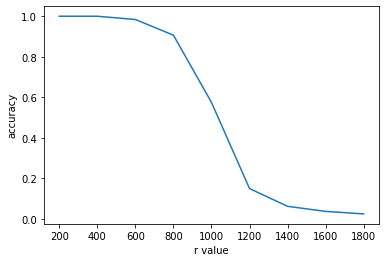

In [5]:
accls1 = []
nolabls1 = []
rls1 =list(range(200,2000,200))
for r in rls1:
    accls1.append(db1.accuracy(testX1,testY1,r))
    nolabls1.append(db1.no_label)
plt.plot(rls1,accls1)
plt.ylabel("accuracy")
plt.xlabel("r value")
plt.show()

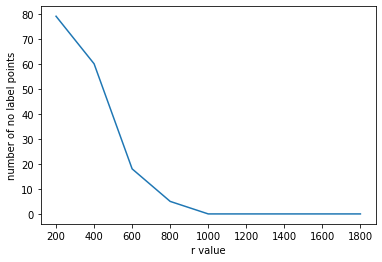

In [6]:
plt.plot(rls1,nolabls1)
plt.ylabel("number of no label points")
plt.xlabel("r value")
plt.show()
#choose 800 as the best radius

In [7]:
# Result for ATNT face dataset
print('Accuracy: %f' % db1.accuracy(testX1,testY1,800))
print('Number of no-label points: ', db1.no_label)

Accuracy: 0.906667
Number of no-label points:  5


In [8]:
# Binalpha handwritten dataset
db2 = DB_classifier()
db2.train(trainX2,trainY2)
print('The smallest distance for Binalpha handwritten data: %f' % db2.min_dis(testX2))
print('The largest distance for Binalpha handwritten data: %f' % db2.max_dis(testX2))

The smallest distance for Binalpha handwritten data: 4.795832
The largest distance for Binalpha handwritten data: 15.459625


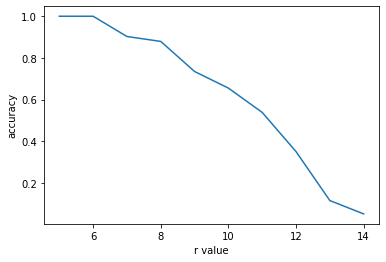

In [9]:
accls2 = []
nolabls2 = []
rls2 =list(range(5,15,1))
for r in rls2:
    accls2.append(db2.accuracy(testX2,testY2,r))
    nolabls2.append(db2.no_label)
plt.plot(rls2,accls2)
plt.ylabel("accuracy")
plt.xlabel("r value")
plt.show()

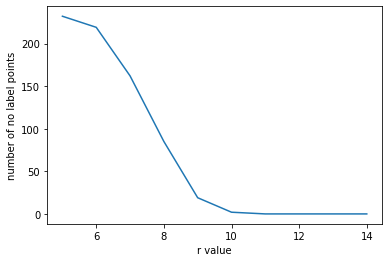

In [10]:
plt.plot(rls2,nolabls2)
plt.ylabel("number of no label points")
plt.xlabel("r value")
plt.show()
#choose 10 as the best radius

In [11]:
# Result for Binalpha handwritten dataset
print('Accuracy: %f' % db2.accuracy(testX2,testY2,10))
print('Number of no-label points: ', db2.no_label)

Accuracy: 0.655172
Number of no-label points:  2


Report(119010259 沈嘉佑/120090414 费祥):  
For the two dataset, we choose the radius by the following steps. Firstly, find the smallest and largest distance between every test data point and training data point. Then set them as the lower and upper bound of the radius range and choose 10 different radius within the range. Among the radius whose no-label point is relatively small, we choose the radius of the highest accuracy as our best radius.

For ATNT face dataset, we choose the radius to be 800. The accuracy is 0.906667 and the number of no-label points is 5. And for Binalpha handwritten dataset, we choose the radius as 800. The accuracy is 0.655172 and the number of no-label points is 2. Compared with the performance of KNN method, the accuracy is slightly reduced and there still exist some no-label points in both datasets. Therefore, we can conclude that he  density based classifier is not as good as the KNN method.

The main difficulty of the density based classifier is the uncertainty of the number of points in the test data balls. Since some dataset may have a unbalanced distribution, some of the points may have many training data points in their balls while other point balls are empty, which results in the variance of results. Besides, different datasets has different scales of distance. Therefore, we can not choose the parameter directly as we do in the KNN method. 
